In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Global covid cases and deaths

<h2> Data cleaning 

In [3]:
def CleanCovid19Data(covidDataPath, dest):
    df = pd.read_csv(covidDataPath)
    df = df.drop(['Province/State', 'Lat', 'Long'], 1, errors='ignore')
    if 'Country/Region' in df.columns.values:
        df.rename(columns={'Country/Region': 'Date'}, inplace=True)
        group_df = df[1:].groupby(df['Date'])
        sum_df = group_df.sum()
        sum_df.loc["World"] = sum_df.apply(lambda x: x.sum())
        result = pd.DataFrame(sum_df.values.T, index=sum_df.columns, columns=sum_df.index)
        result.index = pd.to_datetime(result.index)
        result.index.name = 'Date'
    result.to_csv(dest, index=True, header=True)

<h2>For covid cases

In [4]:
# Data before cleaning, for confirmed cases
COVID = pd.read_csv('/content/drive/MyDrive/home_repo_big_data/data/covid-19/time_series_covid19_confirmed_global.csv')
COVID.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,40026,40073,40141,40200,40287,40357,40510,40626,40687,40768,40833,40937,41032,41145,41268,41334,41425,41501,41633,41728,41814,41935,41975,42033,42092,42297,42463,42609,42795,42969,43035,43240,43403,43628,43851,44228,44443,44503,44706,44988
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,16212,16501,16774,17055,17350,17651,17948,18250,18556,18858,19157,19445,19729,20040,20315,20634,20875,21202,21523,21904,22300,22721,23210,23705,24206,24731,25294,25801,26211,26701,27233,27830,28432,29126,29837,30623,31459,32196,32761,33556
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,53777,53998,54203,54402,54616,54829,55081,55357,55630,55880,56143,56419,56706,57026,57332,57651,57942,58272,58574,58979,59527,60169,60800,61381,62051,62693,63446,64257,65108,65975,66819,67679,68589,69591,70629,71652,72755,73774,74862,75867
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3190,3377,3377,3377,3623,3623,3811,3811,4038,4038,4038,4325,4410,4517,4567,4665,4756,4825,4888,4910,5045,5135,5135,5319,5383,5437,5477,5567,5616,5725,5725,5872,5914,5951,6018,6066,6142,6207,6256,6304
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7096,7222,7462,7622,7829,8049,8338,8582,8829,9026,9381,9644,9871,10074,10269,10558,10805,11035,11228,11577,11813,12102,12223,12335,12433,12680,12816,12953,13053,13228,13374,13451,13615,13818,13922,14134,14267,14413,14493,14634


In [5]:
# Cleaning covid data for confirmed cases
dest = '/content/drive/MyDrive/home_repo_big_data/clean_data/covid-19/cleaned_covid19_confirmed_global.csv'
CleanCovid19Data('/content/drive/MyDrive/home_repo_big_data/data/covid-19/time_series_covid19_confirmed_global.csv', dest)

In [6]:
# Cleaned covid data for confirmed cases
COVID_path = '/content/drive/MyDrive/home_repo_big_data/clean_data/covid-19/cleaned_covid19_confirmed_global.csv'
covid_confirm = pd.read_csv(COVID_path)
covid_confirm.tail()

,Date,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe,World
302,2020-11-19,30623,71652,6066,14134,139,1349434,121979,27792,228683,83994,7348,85317,441159,253,119390,550264,5018,2916,378,143756,76757,9594,5981767,148,114435,2686,74882,641,10082,304,23528,319247,4907,1620,536012,91935,1225490,592,5632,...,2397,58139,91578,61034,16,4382,759658,3016,1541574,18841,15299,5284,201055,285655,6991,609,11772,509,3892,30,2771,6233,83772,430170,11729949,17148,600152,155254,1456940,4377,70921,1,98665,1304,67296,10,2086,17350,9046,56868892
303,2020-11-20,31459,72755,6142,14267,139,1359042,123646,27806,235351,87163,7367,85467,443434,253,120847,553680,5056,2916,378,143854,77994,9594,6020164,148,118418,2686,76414,649,10152,305,23528,324234,4911,1626,537585,91977,1233444,592,5632,...,2399,58143,93396,62580,16,4382,762763,3016,1556730,19280,15530,5289,208295,290601,7079,611,11815,509,3902,30,2796,6261,86265,435273,11925959,17431,614986,156523,1477214,4477,71208,1,99017,1305,68768,10,2090,17373,9120,57534823
304,2020-11-21,32196,73774,6207,14413,139,1366182,124839,27821,241962,89898,7395,85591,445281,255,122435,556904,5110,2916,379,143922,79309,9594,6052786,148,120697,2703,77848,656,10234,306,23528,329191,4911,1633,539143,92037,1240493,596,5632,...,2405,58148,95257,64284,16,4382,765409,3047,1556730,19771,15839,5295,208295,290601,7154,611,11854,509,3913,30,2829,6324,87471,440805,12104032,17667,629850,157785,1497135,4564,71431,1,99435,1306,70254,10,2093,17394,9172,58121067
305,2020-11-22,32761,74862,6256,14493,139,1370366,126224,27834,247188,93094,7413,85705,447341,259,123999,558779,5183,2916,382,143978,80006,9594,6071401,148,121820,2735,79246,662,10276,306,23528,333936,4911,1642,540640,92116,1248417,596,5632,...,2405,58160,96241,65308,16,4445,767679,3047,1556730,20171,16052,5296,208295,290601,7225,617,11894,509,3920,30,2843,6450,88711,446822,12246766,17968,642215,158990,1515802,4699,71617,1,99835,1307,71644,10,2099,17424,9220,58604663
306,2020-11-23,33556,75867,6304,14634,139,1374631,126709,27843,250333,95281,7431,85886,449760,260,125482,559902,5249,2916,386,144034,80553,9992,6087608,149,124966,2754,80505,664,10302,306,23842,340731,4911,1648,542080,92211,1254979,596,5632,...,2406,58165,96472,65778,16,4445,769759,3047,1582616,20508,16052,5297,208295,300352,7295,618,11932,509,3922,30,2854,6475,89196,453535,12418228,18165,653442,160055,1531267,4763,71774,1,100143,1312,73196,10,2107,17454,9308,59126090


In [7]:
# processes the data frame and return 4 numpy arrays 
def process_df(df, s):
    if s == 'US':
        world_col = df['All_states']
    else:
        world_col = df['World']    

    date_col = df['Date']

    countries = df.columns
    countries = countries[1:-1]

    per_country = df.iloc[[-1]]
    per_country_T = per_country.T

    per_country_cases = []
    for i in per_country_T[306]:
        per_country_cases.append(i)
        
    per_country_cases = per_country_cases[1:-1]  

    dates = []
    for i in date_col:
        dates.append(i)

    world_cases_by_date = []
    for i in world_col:
        world_cases_by_date.append(i)    

    per_country_cases = np.array(per_country_cases)
    countries = np.array(countries)

    world_cases_by_date = np.array(world_cases_by_date)
    dates = np.array(dates)    

    return per_country_cases, countries, world_cases_by_date, dates

In [8]:
per_country_cases, countries, world_cases_by_date, dates = process_df(covid_confirm, 'global')

countries_per_country_cases = np.stack((countries, per_country_cases), axis=-1)
countries_per_country_cases = countries_per_country_cases[np.argsort(countries_per_country_cases[:, 1])]

In [9]:
# Countries with least cases
countries_per_country_cases[0:15]

array([['Vanuatu', 1],
       ['Marshall Islands', 4],
       ['MS Zaandam', 9],
       ['Western Sahara', 10],
       ['Solomon Islands', 16],
       ['Saint Kitts and Nevis', 20],
       ['Laos', 25],
       ['Holy See', 27],
       ['Timor-Leste', 30],
       ['Fiji', 35],
       ['Grenada', 41],
       ['Dominica', 77],
       ['Saint Vincent and the Grenadines', 84],
       ['Antigua and Barbuda', 139],
       ['Brunei', 149]], dtype=object)

In [10]:
# Countries with most cases
countries_per_country_cases[175:]

array([['Iran', 866821],
       ['Poland', 876333],
       ['Germany', 946822],
       ['Peru', 949670],
       ['Mexico', 1049358],
       ['Colombia', 1254979],
       ['Argentina', 1374631],
       ['Italy', 1431795],
       ['United Kingdom', 1531267],
       ['Spain', 1582616],
       ['Russia', 2096749],
       ['France', 2195940],
       ['Brazil', 6087608],
       ['India', 9177840],
       ['US', 12418228]], dtype=object)

<h2>For covid deaths

In [11]:
# Data before cleaning, for deaths
COVID = pd.read_csv('/content/drive/MyDrive/home_repo_big_data/data/covid-19/time_series_covid19_deaths_global.csv')
COVID.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1481,1485,1488,1492,1497,1499,1501,1505,1507,1511,1514,1518,1523,1529,1532,1533,1536,1536,1541,1544,1548,1554,1554,1556,1558,1574,1577,1581,1591,1595,1605,1617,1626,1638,1645,1650,1661,1675,1687,1695
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,439,443,448,451,454,458,462,465,469,473,477,480,487,493,499,502,509,518,527,532,536,543,549,557,559,571,579,590,598,605,612,623,631,637,646,657,672,685,699,716
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1827,1841,1846,1856,1865,1873,1880,1888,1897,1907,1914,1922,1931,1941,1949,1956,1964,1973,1980,1980,1999,2011,2024,2036,2048,2062,2077,2093,2111,2124,2139,2154,2168,2186,2206,2224,2236,2255,2272,2294
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,59,59,59,59,62,62,63,63,69,69,69,72,72,72,73,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,76,76,76,76,76,76,76,76,76
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,228,234,241,247,248,251,255,260,265,267,268,270,271,275,275,279,284,286,289,291,296,299,300,303,307,308,308,312,315,317,322,322,324,328,332,333,334,336,337,337


In [12]:
# Cleaning covid data for deaths
dest = '/content/drive/MyDrive/home_repo_big_data/clean_data/covid-19/cleaned_covid19_deaths_global.csv'
CleanCovid19Data('/content/drive/MyDrive/home_repo_big_data/data/covid-19/time_series_covid19_deaths_global.csv', dest)

In [13]:
# Cleaned covid data for deaths
COVID_path = '/content/drive/MyDrive/home_repo_big_data/clean_data/covid-19/cleaned_covid19_deaths_global.csv'
covid_deaths = pd.read_csv(COVID_path)
covid_deaths.head()

,Date,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe,World
0,2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17
1,2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18
2,2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26
3,2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42
4,2020-01-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56


In [14]:
per_country_cases, countries, world_cases_by_date, dates = process_df(covid_deaths, 'global')

countries_per_country_cases = np.stack((countries, per_country_cases), axis=-1)
countries_per_country_cases = countries_per_country_cases[np.argsort(countries_per_country_cases[:, 1])]

In [15]:
# Countries with least death count
countries_per_country_cases[0:25]

array([['Laos', 0],
       ['Marshall Islands', 0],
       ['Grenada', 0],
       ['Mongolia', 0],
       ['Eritrea', 0],
       ['Dominica', 0],
       ['Saint Kitts and Nevis', 0],
       ['Saint Vincent and the Grenadines', 0],
       ['Seychelles', 0],
       ['Solomon Islands', 0],
       ['Cambodia', 0],
       ['Bhutan', 0],
       ['Holy See', 0],
       ['Timor-Leste', 0],
       ['Vanuatu', 0],
       ['Western Sahara', 1],
       ['Burundi', 1],
       ['Saint Lucia', 2],
       ['Fiji', 2],
       ['MS Zaandam', 2],
       ['Monaco', 3],
       ['Brunei', 3],
       ['Antigua and Barbuda', 4],
       ['Papua New Guinea', 7],
       ['Comoros', 7]], dtype=object)

In [16]:
# Countries with most death count
countries_per_country_cases[165:]

array([['Romania', 10177],
       ['Ukraine', 11423],
       ['Canada', 11570],
       ['Iraq', 11996],
       ['Turkey', 12511],
       ['Ecuador', 13225],
       ['Poland', 13774],
       ['Germany', 14460],
       ['Chile', 15106],
       ['Belgium', 15755],
       ['Indonesia', 16002],
       ['South Africa', 20968],
       ['Colombia', 35479],
       ['Peru', 35595],
       ['Russia', 36192],
       ['Argentina', 37122],
       ['Spain', 43131],
       ['Iran', 45255],
       ['France', 49312],
       ['Italy', 50453],
       ['United Kingdom', 55327],
       ['Mexico', 101926],
       ['India', 134218],
       ['Brazil', 169485],
       ['US', 257779]], dtype=object)

# For US


<h2> Covid cases

In [17]:
# Data before cleaning, for confirmed cases
COVID = pd.read_csv('/content/drive/MyDrive/home_repo_big_data/data/covid-19/time_series_covid19_confirmed_US.csv')
COVID.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1958,1971,1985,1995,2006,2018,2021,2027,2040,2055,2070,2079,2098,2120,2134,2154,2168,2182,2195,2210,2229,2244,2257,2286,2307,2328,2328,2351,2385,2417,2435,2456,2481,2506,2529,2554,2580,2597,2617,2634
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6313,6332,6350,6356,6384,6425,6459,6599,6619,6642,6677,6694,6728,6757,6879,6931,6955,6974,6991,7054,7093,7133,7184,7226,7263,7345,7348,7409,7454,7523,7596,7646,7696,7772,7849,7933,8038,8131,8199,8269
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,966,975,978,978,984,993,1007,1010,1028,1030,1030,1038,1042,1052,1053,1058,1059,1062,1073,1077,1079,1089,1092,1095,1098,1107,1107,1112,1113,1117,1123,1128,1130,1134,1137,1145,1151,1157,1160,1161
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,769,773,783,787,789,799,809,823,825,839,841,849,858,862,867,873,877,883,890,900,907,920,926,934,942,948,948,961,966,973,978,986,993,1004,1008,1011,1024,1036,1136,1142
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1796,1822,1837,1848,1863,1887,1907,1923,1934,1947,1958,1986,2002,2027,2054,2089,2109,2128,2178,2204,2233,2258,2290,2302,2338,2378,2378,2400,2429,2488,2518,2549,2574,2594,2648,2683,2704,2735,2754,2763


In [18]:
def CleanCovid19Data_US(covidDataPath, dest, s):
    df = pd.read_csv(covidDataPath)
    if s=='confirm':
        df = df.drop(['Country_Region', 'Lat', 'Long_', 'UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Combined_Key'], 1, errors='ignore')
    else:
        df = df.drop(['Country_Region', 'Lat', 'Long_', 'UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Combined_Key', 'Population'], 1, errors='ignore')

    if 'Province_State' in df.columns.values:
        df.rename(columns={'Province_State': 'Date'}, inplace=True)
        group_df = df[1:].groupby(df['Date'])
        sum_df = group_df.sum()
        sum_df.loc["All_states"] = sum_df.apply(lambda x: x.sum())
        result = pd.DataFrame(sum_df.values.T, index=sum_df.columns, columns=sum_df.index)
        result.index = pd.to_datetime(result.index)
        result.index.name = 'Date'
    result.to_csv(dest, index=True, header=True)

In [19]:
# Cleaning data
dest = '/content/drive/MyDrive/home_repo_big_data/clean_data/covid-19/cleaned_covid19_confirmed_US.csv'
CleanCovid19Data_US('/content/drive/MyDrive/home_repo_big_data/data/covid-19/time_series_covid19_confirmed_US.csv', dest, 'confirm')

In [20]:
# Cleaned covid data for confirmed cases
COVID_path = '/content/drive/MyDrive/home_repo_big_data/clean_data/covid-19/cleaned_covid19_confirmed_US.csv'
covid_confirm = pd.read_csv(COVID_path)
covid_confirm.head()

,Date,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,District of Columbia,Florida,Georgia,Grand Princess,Guam,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Northern Mariana Islands,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming,All_states
0,2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2
3,2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2
4,2020-01-26,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5


In [21]:
per_state_cases, states, US_cases_by_date, dates = process_df(covid_confirm, 'US')

states_per_state_cases = np.stack((states, per_state_cases), axis=-1)
states_per_state_cases = states_per_state_cases[np.argsort(states_per_state_cases[:, 1])]

In [22]:
# Countries with least cases
states_per_state_cases[0:15]

array([['American Samoa', 0],
       ['Diamond Princess', 49],
       ['Grand Princess', 103],
       ['Northern Mariana Islands', 104],
       ['Virgin Islands', 1507],
       ['Vermont', 3714],
       ['Guam', 6452],
       ['Maine', 10544],
       ['Hawaii', 17596],
       ['New Hampshire', 18082],
       ['District of Columbia', 20290],
       ['Alaska', 28273],
       ['Wyoming', 29431],
       ['Delaware', 32211],
       ['West Virginia', 41114]], dtype=object)

In [23]:
# Countries with most cases
states_per_state_cases[45:]

array([['New Jersey', 309588],
       ['Pennsylvania', 320158],
       ['North Carolina', 339194],
       ['Michigan', 340964],
       ['Tennessee', 344550],
       ['Ohio', 363304],
       ['Wisconsin', 379693],
       ['Georgia', 451056],
       ['New York', 602120],
       ['Illinois', 664620],
       ['Florida', 944745],
       ['California', 1128219],
       ['Texas', 1162052]], dtype=object)

In [24]:
def plot_barh(y,x, s):
    plt.rcdefaults()
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.barh(y, x)
    ax.invert_yaxis()

    if s=='confirm cases':
        ax.set_xlabel('Confirmed cases')
        ax.set_title('US states v/s confirmed cases')

    if s=='deaths':
            ax.set_xlabel('Death count')
            ax.set_title('US states v/s deaths')    
    plt.show()
    return

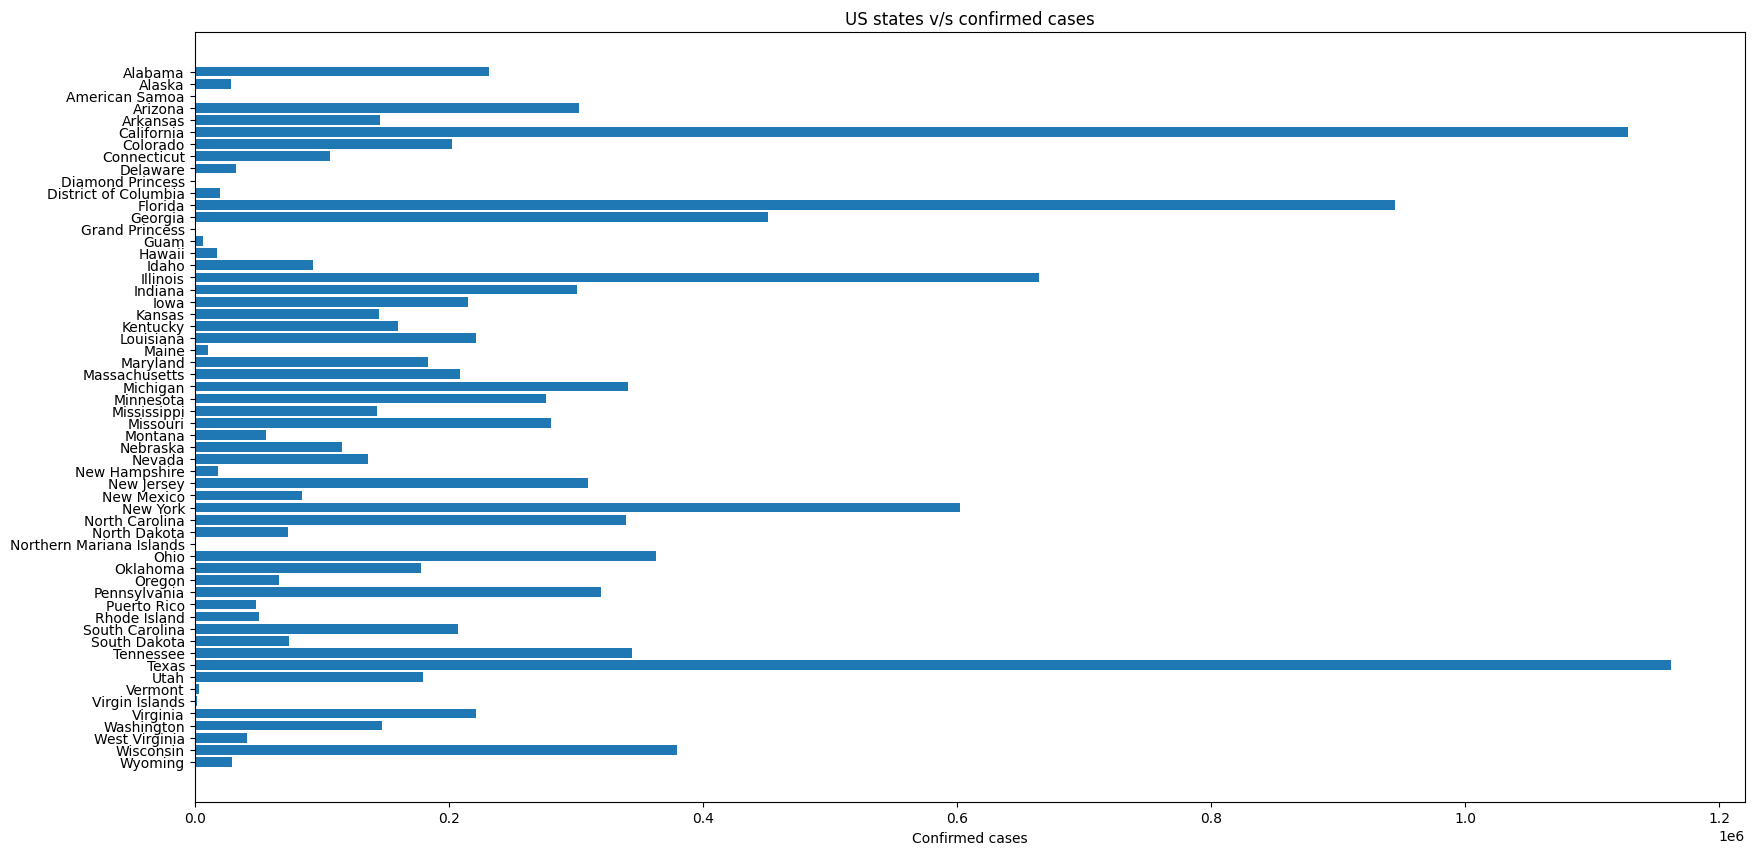

In [25]:
plot_barh(states, per_state_cases, 'confirm cases')

<h2>Covid deaths

In [26]:
# Data before cleaning, for US deaths
COVID = pd.read_csv('/content/drive/MyDrive/home_repo_big_data/data/covid-19/time_series_covid19_deaths_US.csv')
COVID.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,...,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",55869,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,28,28,28,28,28,29,30,30,30,31,31,31,31,31,31,31,31,31,31,31,31,31,30,30,30,30,30,32,32,36,36,36,36,37,37,39,39,39,39,39
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",223234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,66,67,67,67,67,69,69,69,69,69,69,69,69,69,69,71,71,71,71,74,77,77,83,83,83,83,84,84,84,84,84,84,84,84,84,84,84,84,84,84
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",24686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,10,10,10,10,10,10
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",22394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13,13,13,13,13,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,16,16,16,17,17,17,17,17,17,17,17,18,18,18,17,17,17
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",57826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,23,23,23,23,23,24,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,26,26,26,26,26,34,34,34,34,34,34,34,35,35,35,36,36,36


In [27]:
# Cleaning data
dest = '/content/drive/MyDrive/home_repo_big_data/clean_data/covid-19/cleaned_covid19_deaths_US.csv'
CleanCovid19Data_US('/content/drive/MyDrive/home_repo_big_data/data/covid-19/time_series_covid19_deaths_US.csv', dest, 'deaths')

In [28]:
# Cleaned covid data for US deaths 
COVID_path = '/content/drive/MyDrive/home_repo_big_data/clean_data/covid-19/cleaned_covid19_deaths_US.csv'
covid_deaths = pd.read_csv(COVID_path)
covid_deaths.head()

,Date,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,District of Columbia,Florida,Georgia,Grand Princess,Guam,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Northern Mariana Islands,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming,All_states
0,2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-01-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
per_state_cases, states, US_cases_by_date, dates = process_df(covid_deaths, 'US')

states_per_state_cases = np.stack((states, per_state_cases), axis=-1)
states_per_state_cases = states_per_state_cases[np.argsort(states_per_state_cases[:, 1])]

In [30]:
# Countries with least death count
states_per_state_cases[0:15]

array([['American Samoa', 0],
       ['Diamond Princess', 0],
       ['Northern Mariana Islands', 2],
       ['Grand Princess', 3],
       ['Virgin Islands', 23],
       ['Vermont', 63],
       ['Alaska', 103],
       ['Guam', 103],
       ['Maine', 177],
       ['Wyoming', 202],
       ['Hawaii', 233],
       ['New Hampshire', 512],
       ['Montana', 614],
       ['West Virginia', 667],
       ['District of Columbia', 672]], dtype=object)

In [31]:
# Countries with most death count
states_per_state_cases[45:]

array([['Ohio', 6020],
       ['Louisiana', 6284],
       ['Arizona', 6464],
       ['Michigan', 8940],
       ['Georgia', 9215],
       ['Pennsylvania', 9846],
       ['Massachusetts', 10531],
       ['Illinois', 12111],
       ['New Jersey', 16772],
       ['Florida', 18085],
       ['California', 18753],
       ['Texas', 21049],
       ['New York', 34339]], dtype=object)

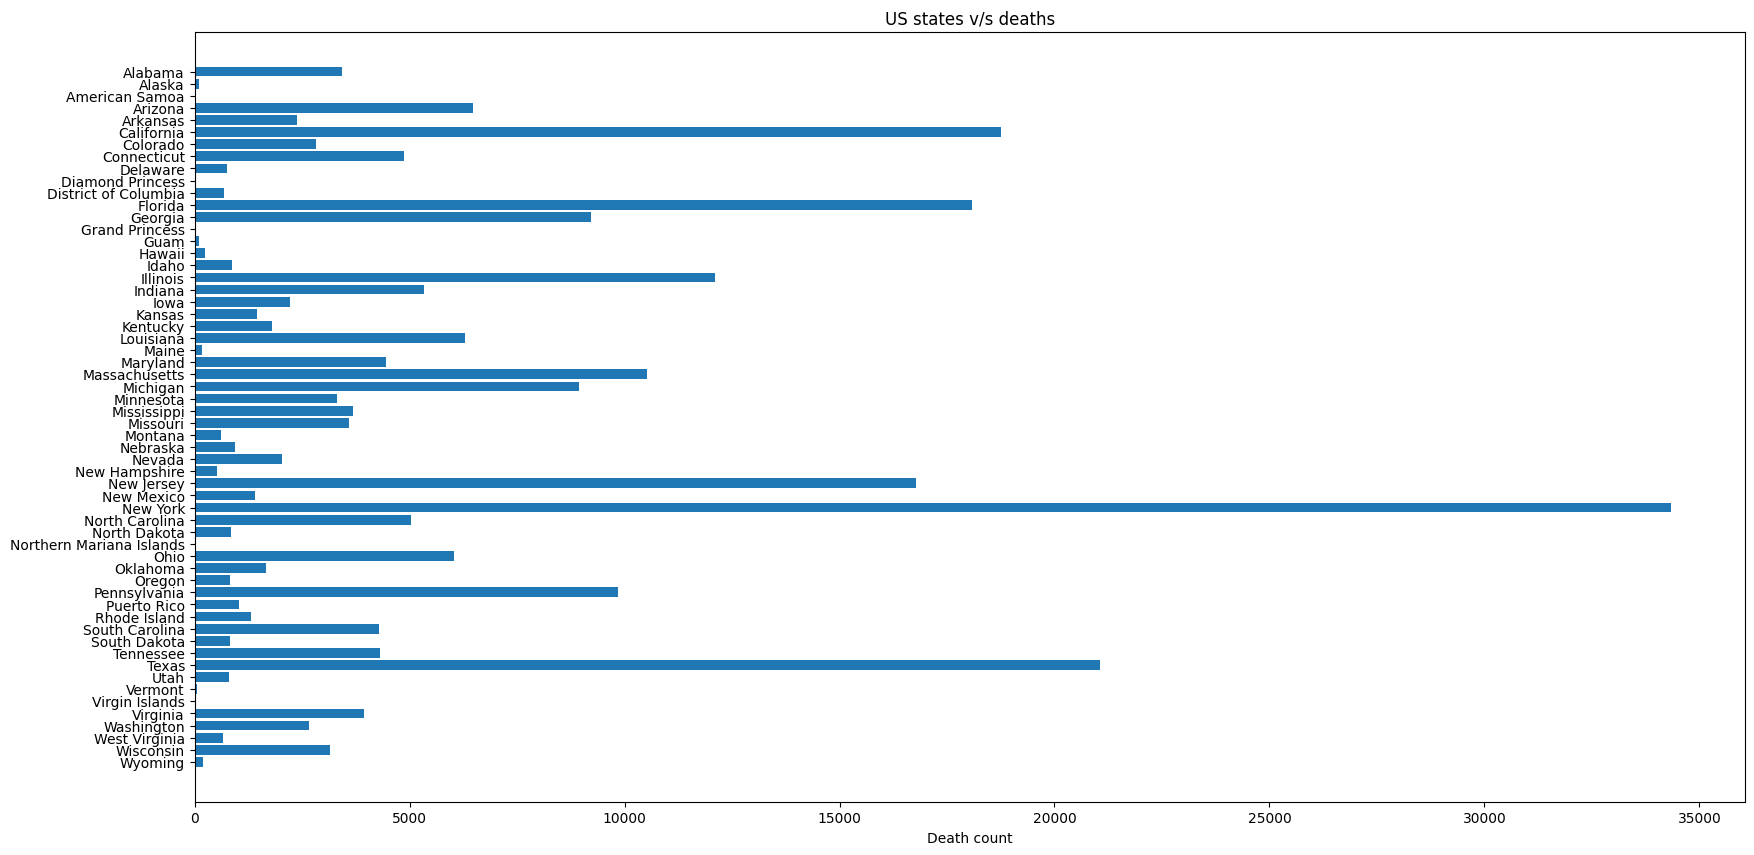

In [32]:
plot_barh(states, per_state_cases, 'deaths')